# Introduction to Deep Learning
## [DataCamp Course Dashboard](https://www.datacamp.com/courses/deep-learning-in-python)

### Imagine you work for a bank
- You need to predict how many transactions each customer will make next year
- You have features like `age`, `bank_balance`, `retirement_status`, etc.

#### How would a linear regression model work through this problem?
- The LR model would look at the influence of each feature individually and not the interactions between the features. This is not ideal from an intutive standpoint.

# Interactions
- Neural networks account for interactions really well
- Deep learning uses especially powerful neural networks

# Course structure
- First two chapters focus on conceptual knowledge
    - Debug and tune deep learning models on conventional prediction problems
    - Lay the foundation for progressing towards modern applications
    
## Build deep learning models with keras
```python
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
predictors = np.loadtxt('predictors_data.csv', delimiter=',')
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
```

## Deep learning models capture interactions
- We generate a function that describes the interaction of variables and use that function to predict the outcome of the response variable.
- The input layer describes our predictive features (`age`, `bank_balance`, `retirement_status`, etc)
- The output layer describes our response variable or what we want to predict.
- All other layers are called the hidden layers because these are non-empirical values that are calculated by the model to account for the interaction between variables in the input layer and more accurately predict the output layer.

# Forward propagation
- First step of the **forward propagation algorithm** is to draw lines between the input layer and the nodes of the hidden layer.
- Each line is given a weight to account for the strength of that interaction.
- Next, each input layer value is multiplied by its line weight and added to all other input layer calculations corresponding to that node.
- This process to repeated to draw lines, assign weights, and apply calculations to yeild the output layer value.

    - Multiply - add process
    - Dot product
    - Forward propagation for one data point at a time
    - Output is the prediction for that data point

In [1]:
# Forward propagation code

import numpy as np
input_data = np.array([2, 3])
weights = {'node_0': np.array([1, 1]),
          'node_1': np.array([-1, 1]),
          'output': np.array([2, -1])}
node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

hidden_layer_values = np.array([node_0_value, node_1_value])
print('hidden layer values: ', hidden_layer_values)

output = (hidden_layer_values * weights['output']).sum()
print('output value: ', output)

hidden layer values:  [5 1]
output value:  9


In [3]:
input_data = np.array([3, 5])
weights = {'node_0': np.array([2, 4]), 
           'node_1': np.array([ 4, -5]), 
           'output': np.array([2, 7])}

# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


# Activation functions

- These functions allow the model to capture nonlinearities.
- Applied to node inputs to produce node output
- `tanh()` was a very popular activation function
- Today, ReLU (Rectified Linear Activation) is the industry standard activation function
$$RELU(x) = \left\{\begin{matrix}
0 \text{ if } x<0\\ 
x \text{ if } x\geq 0
\end{matrix}\right.$$

In [5]:
# Activation function code

import numpy as np
input_data = np.array([-1, 2])
weights = {'node_0': np.array([3, 3]),
          'node_1': np.array([1, 5]),
          'output': np.array([2, -1])}
node_0_input = (input_data * weights['node_0']).sum()

node_0_output = np.tanh(node_0_input)

node_1_input = (input_data * weights['node_1']).sum()

node_1_output = np.tanh(node_1_input)

hidden_layer_outputs = np.array([node_0_output, node_1_output])
print('hidden layer outputs: ', hidden_layer_outputs)

output = (hidden_layer_outputs * weights['output']).sum()
print('output value: ', output)

hidden layer outputs:  [0.99505475 0.99999997]
output value:  0.9901095378334199


The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

In [13]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

input_data = np.array([3, 5])
weights = {'node_0': np.array([2, 4]), 
           'node_1': np.array([ 4, -5]), 
           'output': np.array([2, 7])}

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print('output layer value:', model_output, '\nWithout the activation function, \
this prediction would be negative.')

output layer value: 52 
Without the activation function, this prediction would be negative.


In [14]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights = {'node_0': np.array([2, 4]), 
           'node_1': np.array([ 4, -5]), 
           'output': np.array([2, 7])}

# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[52, 63, 0, 148]


# Deeper networks
## Multiple hidden layers
## Representation learning
- Deep networks internally build representations of patterns in the data.
- Partially replace the need for feature engineering
- Subsequent layers build increasingly sophisticated representations of raw data

# Deep learning
- Modeler doesn't need to specify the interactions
- When you train the model, the neural network gets weights that find the relevant patterns to make better predictions

*Identity function* - each node's output will be the same as its input.

In [23]:
input_data = np.array([3, 5])
weights = {'node_0_0': np.array([2, 4]),
           'node_0_1': np.array([ 4, -5]),
           'node_1_0': np.array([-1,  2]),
           'node_1_1': np.array([1, 2]),
           'output': np.array([2, 7])}

def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print('The output value is:', output)

The output value is: 182


# The need for optimization
## Loss function
- Aggregates errors in predictions from many data points into single number
- Measure of model's predictive performance
- Mean Squared Error loss function
- Goal: Find the weights that give the lowest value of the loss function
- Gradient descent is the method

In [27]:
def predict_with_network_weights(input_data_point, weights):
    '''Takes input data and a dictionary of weights and
    returns the neural network output layer value.
    '''
    
    node_0_input = (input_data_point * weights['node_0']).sum()
    node_0_output = relu(node_0_input)
    
    node_1_input = (input_data_point * weights['node_1']).sum()
    node_1_output = relu(node_1_input)
    
    hidden_layer_values = np.array([node_0_output, node_1_output])
    
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    
    model_output = relu(input_to_final_layer)
    
    return(model_output)

To pull this code from DataCamp, I imported the `inspect` package and used the `getsource()` function passing in `predict_with_network`.

In [28]:
import inspect
inspect.getsource(predict_with_network_weights)

"def predict_with_network_weights(input_data_point, weights):\n    '''Takes input data and a dictionary of weights and\n    returns the neural network output layer value.\n    '''\n    \n    node_0_input = (input_data_point * weights['node_0']).sum()\n    node_0_output = relu(node_0_input)\n    \n    node_1_input = (input_data_point * weights['node_1']).sum()\n    node_1_output = relu(node_1_input)\n    \n    hidden_layer_values = np.array([node_0_output, node_1_output])\n    \n    input_to_final_layer = (hidden_layer_values * weights['output']).sum()\n    \n    model_output = relu(input_to_final_layer)\n    \n    return(model_output)\n"

In [25]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network_weights(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 0],
             'output': [1, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network_weights(input_data, weights_1)

# Calculate error: error_1
error_1 = target_actual - model_output_1

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


In [29]:
input_data = [np.array([0, 3]), 
              np.array([1, 2]), 
              np.array([-1, -2]), 
              np.array([4, 0])]
weights_0 = {'node_0': np.array([2, 1]), 
             'node_1': np.array([1, 2]), 
             'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1. , 1.5]),
             'output': np.array([1. , 1.5])}
target_actuals = [1, 3, 5, 7]

In [33]:
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in tqdm(input_data):
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network_weights(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network_weights(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

100%|██████████| 4/4 [00:00<00:00, 3683.25it/s]

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


# Gradient Descent
- If the slope is positive:
    - Going opposite the slope means moving to lower numbers
    - Subtract the slope from the current value
    - Too big a step might lead us astray
- Solution: learning rate
    - Update each weight by subtracting **learning rate \* slope** (learning rates are usually around 0.01)
    
# Slope calculation example
- To calculate the slope for a weight, need to multiply:
    - Slope of the loss function with respect to (w.r.t.) value at the node we feed into
        - Slope of mean-squared loss function w.r.t. prediction
        - 2 \* (Predicted Value - Actual Value) = 2 \* Error
    - The value of the node that feeds into our weight
    - Slope of the activation function w.r.t. value we feed into

In [34]:
import numpy as np
weights = np.array([1, 2])
input_data = np.array([3, 4])
target = 6
learning_rate = 0.01
preds = (weights * input_data).sum()
error = preds - target
print(error)

5


In [35]:
gradient = 2 * input_data * error

gradient

array([30, 40])

In [37]:
weights_updated = weights - learning_rate * gradient
preds_updated = (weights_updated * input_data).sum()
error_updated = preds_updated - target
print(error_updated)

2.5


In [39]:
input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

[14 28 42]


In [41]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - (learning_rate * slope)

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print('original weighted error:', error)

# Print the updated error
print('mse updated error:', error_updated)

original weighted error: 7
mse updated error: 5.04


In [45]:
def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

In [46]:
import matplotlib.pyplot as plt

100%|██████████| 20/20 [00:00<00:00, 8658.76it/s]


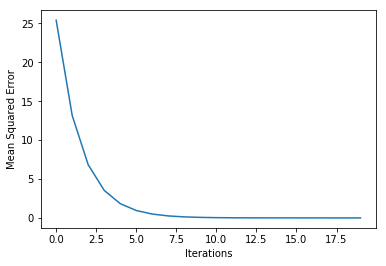

In [47]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in tqdm(range(n_updates)):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

# Backpropagation

- Calculate slopes in more complex models
- Allows gradient descent to update all weights in neural network (by getting gradients for all weights)
- Comes from chain rule of calculus
- Important to understand the process, but you will generally use a library that implements this

# Process
- Trying to estimate the slope of the loss function w.r.t. each weight
- Do forward propagation to calculate predictions and errors
    - Go back one layer at a time
    - Gradients for weight is product of:
        1. Node value feeding into that weight
        2. Slope of loss function w.r.t. node it feeds into
        3. Slope of activation function at the node it feeds into
    
- Need to also keep track of the slpes of the loss function w.r.t. node values
- Slope of node values are the sum of the slopes for all weights that come out of them

- Each time you generate predictions using forward propagation, you update the weights using backward propagation.

# Calculating slopes associated with any weight
- Gradient for weight is product of:
    1. Node value feeding into that weight
    2. Slope of activation function for the node being fed into
    3. Slope of loss function w.r.t. output node
    
# Recap
- Start at some random set of weights
- Use forward propagation to make a prediction
- Use backward propagation to calculate the slope of the loss function w.r.t. each weight
- Multiply that slope by the learning rate, and subtract from the current weights
- Keep going with that cycle until we get to a flat part

# Stochastic gradient descent
- It is common to calculate slopes on only a subset of the data ('batch')
- Use a different batch of data to calculate the next update
- Start over from the beginning once all data is used
- Each time through the training data is called an epoch
- When slopes are calculated on one batch at a time:
    - stochastic gradient descent
    
# Creating a keras model
## Model building steps
- Specify Architecture
- Compile
- Fit
- Predict

```python
import numpy as np
from keras.layers import Dense
from keras.models import Sequential

predictors = np.loadtxt('predictors_data.csv',
                        delimiter=',')
n_cols = predictors.shape[1]

model = Sequential()
model.add(Dense(100, activation='relu', 
                input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
```

In [54]:
predictors = np.loadtxt('hourly_wages.csv', delimiter=',', skiprows=1, usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9))

In [55]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

# Compiling and fitting a model
- Specify the optimizer
    - Controls the learning rate
    - Many options and mathematically comples
    - "Adam" is usually a good choice
- Loss function
    - "mean_squared_error" common for regression
```python
model.compile(optimizer='adam', loss='mean_squared_error')
```

# Fitting a model
- Applying backpropagation and gradient descent with your data to update the weights
- Scaling data before fitting can ease optimization

```python
model.fit(predictors, target)
```

In [56]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


In [57]:
target = np.loadtxt('hourly_wages.csv', delimiter=',', skiprows=1, usecols=(0))

In [58]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(predictors, target)

Epoch 1/1
534/534 [==============================] - 0s 693us/step - loss: 142.1494


# Classification
- 'categarical_crossentropy' loss function
- Similar to log loss: Lower is better
- Add metrics = `['accuracy']` to compile step for easy-to-understand diagnostics
- Output layer has separate node for each possible outcome and uses `softmax` activation

```python
from keras.utils import to_categorical
data = pd.read_csv('basketball_shot_log.csv')
predictors = data.drop(['shot_results']), axis=1).as_matrix()
target = to_categorical(data.shot_result)

model = Sequential()
model.add(Dense(100, activation='relu', 
                input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors, target)
```

In [59]:
import pandas as pd

In [68]:
df = pd.read_csv('titanic_all_numeric.csv')
df.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [70]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Convert the target to categorical: target
predictors = df.drop('survived', axis=1).values
target = to_categorical(df.survived)

n_cols = predictors.shape[1]
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', 
                input_shape = (n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)

Epoch 1/1
891/891 [==============================] - 0s 401us/step - loss: 3.3760 - acc: 0.6117


# Using a Model
- Save
- Reload
- Make Predictions

```python
from keras.models import load_model
model.save('model_file.h5')
my_model = load_model('my_model.h5')
predictions = my_model.predict(data_to_predict_with)
probability_true = predictions[:,1]
```

# Verify model structure
```python
my_model.summary()
```

In [71]:
pred_data = np.array([[2, 34.0, 0, 0, 13.0, 1, False, 0, 0, 1],
                       [2, 31.0, 1, 1, 26.25, 0, False, 0, 0, 1],
                       [1, 11.0, 1, 2, 120.0, 1, False, 0, 0, 1],
                       [3, 0.42, 0, 1, 8.5167, 1, False, 1, 0, 0],
                       [3, 27.0, 0, 0, 6.975, 1, False, 0, 0, 1],
                       [3, 31.0, 0, 0, 7.775, 1, False, 0, 0, 1],
                       [1, 39.0, 0, 0, 0.0, 1, False, 0, 0, 1],
                       [3, 18.0, 0, 0, 7.775, 0, False, 0, 0, 1],
                       [2, 39.0, 0, 0, 13.0, 1, False, 0, 0, 1],
                       [1, 33.0, 1, 0, 53.1, 0, False, 0, 0, 1],
                       [3, 26.0, 0, 0, 7.8875, 1, False, 0, 0, 1],
                       [3, 39.0, 0, 0, 24.15, 1, False, 0, 0, 1],
                       [2, 35.0, 0, 0, 10.5, 1, False, 0, 0, 1],
                       [3, 6.0, 4, 2, 31.275, 0, False, 0, 0, 1],
                       [3, 30.5, 0, 0, 8.05, 1, False, 0, 0, 1],
                       [1, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
                       [3, 23.0, 0, 0, 7.925, 0, False, 0, 0, 1],
                       [2, 31.0, 1, 1, 37.0042, 1, False, 1, 0, 0],
                       [3, 43.0, 0, 0, 6.45, 1, False, 0, 0, 1],
                       [3, 10.0, 3, 2, 27.9, 1, False, 0, 0, 1],
                       [1, 52.0, 1, 1, 93.5, 0, False, 0, 0, 1],
                       [3, 27.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
                       [1, 38.0, 0, 0, 0.0, 1, False, 0, 0, 1],
                       [3, 27.0, 0, 1, 12.475, 0, False, 0, 0, 1],
                       [3, 2.0, 4, 1, 39.6875, 1, False, 0, 0, 1],
                       [3, 29.69911764705882, 0, 0, 6.95, 1, True, 0, 1, 0],
                       [3, 29.69911764705882, 0, 0, 56.4958, 1, True, 0, 0, 1],
                       [2, 1.0, 0, 2, 37.0042, 1, False, 1, 0, 0],
                       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
                       [1, 62.0, 0, 0, 80.0, 0, False, 0, 0, 0],
                       [3, 15.0, 1, 0, 14.4542, 0, False, 1, 0, 0],
                       [2, 0.83, 1, 1, 18.75, 1, False, 0, 0, 1],
                       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
                       [3, 23.0, 0, 0, 7.8542, 1, False, 0, 0, 1],
                       [3, 18.0, 0, 0, 8.3, 1, False, 0, 0, 1],
                       [1, 39.0, 1, 1, 83.1583, 0, False, 1, 0, 0],
                       [3, 21.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
                       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
                       [3, 32.0, 0, 0, 56.4958, 1, False, 0, 0, 1],
                       [1, 29.69911764705882, 0, 0, 29.7, 1, True, 1, 0, 0],
                       [3, 20.0, 0, 0, 7.925, 1, False, 0, 0, 1],
                       [2, 16.0, 0, 0, 10.5, 1, False, 0, 0, 1],
                       [1, 30.0, 0, 0, 31.0, 0, False, 1, 0, 0],
                       [3, 34.5, 0, 0, 6.4375, 1, False, 1, 0, 0],
                       [3, 17.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
                       [3, 42.0, 0, 0, 7.55, 1, False, 0, 0, 1],
                       [3, 29.69911764705882, 8, 2, 69.55, 1, True, 0, 0, 1],
                       [3, 35.0, 0, 0, 7.8958, 1, False, 1, 0, 0],
                       [2, 28.0, 0, 1, 33.0, 1, False, 0, 0, 1],
                       [1, 29.69911764705882, 1, 0, 89.1042, 0, True, 1, 0, 0],
                       [3, 4.0, 4, 2, 31.275, 1, False, 0, 0, 1],
                       [3, 74.0, 0, 0, 7.775, 1, False, 0, 0, 1],
                       [3, 9.0, 1, 1, 15.2458, 0, False, 1, 0, 0],
                       [1, 16.0, 0, 1, 39.4, 0, False, 0, 0, 1],
                       [2, 44.0, 1, 0, 26.0, 0, False, 0, 0, 1],
                       [3, 18.0, 0, 1, 9.35, 0, False, 0, 0, 1],
                       [1, 45.0, 1, 1, 164.8667, 0, False, 0, 0, 1],
                       [1, 51.0, 0, 0, 26.55, 1, False, 0, 0, 1],
                       [3, 24.0, 0, 3, 19.2583, 0, False, 1, 0, 0],
                       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
                       [3, 41.0, 2, 0, 14.1083, 1, False, 0, 0, 1],
                       [2, 21.0, 1, 0, 11.5, 1, False, 0, 0, 1],
                       [1, 48.0, 0, 0, 25.9292, 0, False, 0, 0, 1],
                       [3, 29.69911764705882, 8, 2, 69.55, 0, True, 0, 0, 1],
                       [2, 24.0, 0, 0, 13.0, 1, False, 0, 0, 1],
                       [2, 42.0, 0, 0, 13.0, 0, False, 0, 0, 1],
                       [2, 27.0, 1, 0, 13.8583, 0, False, 1, 0, 0],
                       [1, 31.0, 0, 0, 50.4958, 1, False, 0, 0, 1],
                       [3, 29.69911764705882, 0, 0, 9.5, 1, True, 0, 0, 1],
                       [3, 4.0, 1, 1, 11.1333, 1, False, 0, 0, 1],
                       [3, 26.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
                       [1, 47.0, 1, 1, 52.5542, 0, False, 0, 0, 1],
                       [1, 33.0, 0, 0, 5.0, 1, False, 0, 0, 1],
                       [3, 47.0, 0, 0, 9.0, 1, False, 0, 0, 1],
                       [2, 28.0, 1, 0, 24.0, 0, False, 1, 0, 0],
                       [3, 15.0, 0, 0, 7.225, 0, False, 1, 0, 0],
                       [3, 20.0, 0, 0, 9.8458, 1, False, 0, 0, 1],
                       [3, 19.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
                       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
                       [1, 56.0, 0, 1, 83.1583, 0, False, 1, 0, 0],
                       [2, 25.0, 0, 1, 26.0, 0, False, 0, 0, 1],
                       [3, 33.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
                       [3, 22.0, 0, 0, 10.5167, 0, False, 0, 0, 1],
                       [2, 28.0, 0, 0, 10.5, 1, False, 0, 0, 1],
                       [3, 25.0, 0, 0, 7.05, 1, False, 0, 0, 1],
                       [3, 39.0, 0, 5, 29.125, 0, False, 0, 1, 0],
                       [2, 27.0, 0, 0, 13.0, 1, False, 0, 0, 1],
                       [1, 19.0, 0, 0, 30.0, 0, False, 0, 0, 1],
                       [3, 29.69911764705882, 1, 2, 23.45, 0, True, 0, 0, 1],
                       [1, 26.0, 0, 0, 30.0, 1, False, 1, 0, 0],
                       [3, 32.0, 0, 0, 7.75, 1, False, 0, 1, 0]])

In [73]:
# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target, epochs=10)

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

Epoch 1/10
891/891 [==============================] - 0s 311us/step - loss: 2.1064 - acc: 0.6341
Epoch 2/10
891/891 [==============================] - 0s 35us/step - loss: 1.0919 - acc: 0.6352
Epoch 3/10
891/891 [==============================] - 0s 34us/step - loss: 0.8708 - acc: 0.6498
Epoch 4/10
891/891 [==============================] - 0s 35us/step - loss: 0.7861 - acc: 0.6599
Epoch 5/10
891/891 [==============================] - 0s 34us/step - loss: 0.6228 - acc: 0.6925
Epoch 6/10
891/891 [==============================] - 0s 34us/step - loss: 0.6328 - acc: 0.6712
Epoch 7/10
891/891 [==============================] - 0s 35us/step - loss: 0.6131 - acc: 0.6936
Epoch 8/10
891/891 [==============================] - 0s 34us/step - loss: 0.6112 - acc: 0.6902
Epoch 9/10
891/891 [==============================] - 0s 36us/step - loss: 0.6042 - acc: 0.6801
Epoch 10/10
891/891 [==============================] - 0s 34us/step - loss: 0.5919 - acc: 0.6958
[0.37030083 0.6444879  0.5778268  0.47

# Understanding model optimization
## Why optimization is hard
- Simultaneously optimizing 1000s of parameters with complex relationships
- Updates may not improve model meaningfully
- Updates too small (if learning rate is low) or too large (if learning rate is high)

```python
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)
lr_to_test = [.000001, 0.01, 1]
for lr in lr_to_test:
    model = get_new_model()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    model.fit(predictors, target)
```

# Dying neuron problem
- Once a node starts always getting negative inputs (recall `relu`)
    - It may continue only getting negative inputs
- Contributes nothing to the model
    - "Dead" neuron
    
# Vanishing gradients
- Occurs when many layers have very small slopes (e.g. due to being on flat part of `tanh` curve)
- In deep networks, updates to backprop were close to 0

In [75]:
input_shape = (10,)
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [77]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in tqdm(lr_to_test):
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target, epochs=10)
    

  0%|          | 0/3 [00:00<?, ?it/s]



Testing model with learning rate: 0.000001

Epoch 1/10
891/891 [==============================] - 0s 440us/step - loss: 3.0788
Epoch 2/10
891/891 [==============================] - 0s 41us/step - loss: 3.0282
Epoch 3/10
891/891 [==============================] - 0s 41us/step - loss: 2.9779
Epoch 4/10
891/891 [==============================] - 0s 40us/step - loss: 2.9281
Epoch 5/10
891/891 [==============================] - 0s 40us/step - loss: 2.8786
Epoch 6/10
891/891 [==============================] - 0s 40us/step - loss: 2.8294
Epoch 7/10
891/891 [==============================] - 0s 40us/step - loss: 2.7808
Epoch 8/10
891/891 [==============================] - 0s 39us/step - loss: 2.7326
Epoch 9/10
891/891 [==============================] - 0s 40us/step - loss: 2.6851
Epoch 10/10
891/891 [==============================] - 0s 40us/step - loss: 2.6383


 33%|███▎      | 1/3 [00:00<00:01,  1.01it/s]



Testing model with learning rate: 0.010000

Epoch 1/10
891/891 [==============================] - 0s 459us/step - loss: 2.0843
Epoch 2/10
891/891 [==============================] - 0s 41us/step - loss: 0.7650
Epoch 3/10
891/891 [==============================] - 0s 42us/step - loss: 0.6427
Epoch 4/10
891/891 [==============================] - 0s 41us/step - loss: 0.6521
Epoch 5/10
891/891 [==============================] - 0s 40us/step - loss: 0.6042
Epoch 6/10
891/891 [==============================] - 0s 44us/step - loss: 0.6262
Epoch 7/10
891/891 [==============================] - 0s 45us/step - loss: 0.6022
Epoch 8/10
891/891 [==============================] - 0s 46us/step - loss: 0.5978
Epoch 9/10
891/891 [==============================] - 0s 46us/step - loss: 0.6087
Epoch 10/10
891/891 [==============================] - 0s 45us/step - loss: 0.5831


 67%|██████▋   | 2/3 [00:02<00:01,  1.00s/it]



Testing model with learning rate: 1.000000

Epoch 1/10
891/891 [==============================] - 0s 502us/step - loss: 9.5863
Epoch 2/10
891/891 [==============================] - 0s 44us/step - loss: 9.9314
Epoch 3/10
891/891 [==============================] - 0s 44us/step - loss: 9.9314
Epoch 4/10
891/891 [==============================] - 0s 44us/step - loss: 9.9314
Epoch 5/10
891/891 [==============================] - 0s 44us/step - loss: 9.9314
Epoch 6/10
891/891 [==============================] - 0s 43us/step - loss: 9.9314
Epoch 7/10
891/891 [==============================] - 0s 45us/step - loss: 9.9314
Epoch 8/10
891/891 [==============================] - 0s 43us/step - loss: 9.9314
Epoch 9/10
891/891 [==============================] - 0s 45us/step - loss: 9.9314
Epoch 10/10
891/891 [==============================] - 0s 43us/step - loss: 9.9314


100%|██████████| 3/3 [00:03<00:00,  1.06s/it]


# Model validation

## Validation in deep learning
- Commonly use validation spit rather then cross-validation
- Deep learning widely used on large datasets
- Single validation score is based on large amount of data, and is reliable
- Repeated training from cross-validation would take a long time

# Validation split
```python
model.compile(optimizer = 'atom', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors, target, validation_split=0.3)
```

# Early Stopping
```python
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)
model.fit(predictors, target, validation_split=0.3, epochs=20, callbacks = [early_stopping_monitor])
```

# Experimentation
- Experiment with different architectures
- More layers
- Fewer layers
- Layers with more nodes
- Layers with fewer nodes
- **Creating a great model requires experimentation**

In [79]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3, 
                 epochs=30, callbacks = [early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 1s 1ms/step - loss: 1.9526 - acc: 0.5746 - val_loss: 1.3390 - val_acc: 0.6418
Epoch 2/30
623/623 [==============================] - 0s 61us/step - loss: 0.8808 - acc: 0.6180 - val_loss: 0.7011 - val_acc: 0.6866
Epoch 3/30
623/623 [==============================] - 0s 61us/step - loss: 0.7361 - acc: 0.6485 - val_loss: 0.5956 - val_acc: 0.7164
Epoch 4/30
623/623 [==============================] - 0s 61us/step - loss: 0.7074 - acc: 0.6501 - val_loss: 0.5419 - val_acc: 0.7500
Epoch 5/30
623/623 [==============================] - 0s 62us/step - loss: 0.6315 - acc: 0.6726 - val_loss: 0.5442 - val_acc: 0.7201
Epoch 6/30
623/623 [==============================] - 0s 62us/step - loss: 0.6397 - acc: 0.6854 - val_loss: 0.5685 - val_acc: 0.7239


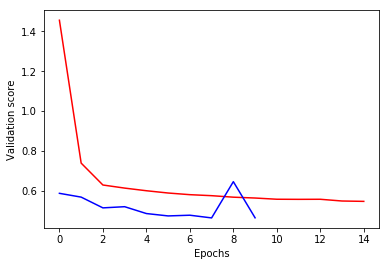

In [81]:
# Specify the model
model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape = input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))

# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

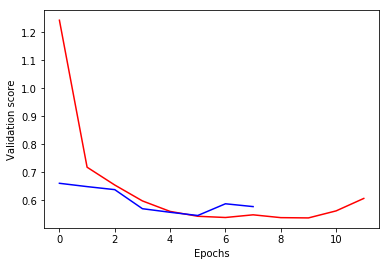

In [83]:
# Specify the model
model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape = input_shape))
model_1.add(Dense(2, activation='softmax'))

# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape = input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

# Thinking about model capacity
## Overfitting and underfitting

# Stepping up to images
- MNIST dataset

In [104]:
mnist = pd.read_csv('mnist.csv', header=None, skiprows=1)
mnist.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,2000.0000,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,...,2000.000000,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,4.4540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.048500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.8957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.168986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,97.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
X = mnist.drop(columns=0).values
y = mnist[0]
X.shape

(2000, 784)

In [134]:
y = to_categorical(y)
y.shape

(2000, 10)

In [138]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape = (784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X, y, epochs=20, validation_split=0.3)

Train on 1400 samples, validate on 600 samples
Epoch 1/20
1400/1400 [==============================] - 1s 898us/step - loss: 13.2371 - acc: 0.1643 - val_loss: 11.4765 - val_acc: 0.2717
Epoch 2/20
1400/1400 [==============================] - 0s 96us/step - loss: 10.8432 - acc: 0.3186 - val_loss: 10.3347 - val_acc: 0.3433
Epoch 3/20
1400/1400 [==============================] - 0s 96us/step - loss: 9.7598 - acc: 0.3843 - val_loss: 10.7840 - val_acc: 0.3117
Epoch 4/20
1400/1400 [==============================] - 0s 96us/step - loss: 9.5140 - acc: 0.3993 - val_loss: 10.3398 - val_acc: 0.3400
Epoch 5/20
1400/1400 [==============================] - 0s 95us/step - loss: 8.7601 - acc: 0.4457 - val_loss: 9.1511 - val_acc: 0.4217
Epoch 6/20
1400/1400 [==============================] - 0s 95us/step - loss: 8.1873 - acc: 0.4871 - val_loss: 9.0162 - val_acc: 0.4383
Epoch 7/20
1400/1400 [==============================] - 0s 97us/step - loss: 8.0262 - acc: 0.4971 - val_loss: 9.3801 - val_acc: 0.4117
E